<a href="https://colab.research.google.com/github/WRD397/Practices/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## LOADING

In [2]:
(train_img, train_label), (test_img, test_label) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_img.shape

(60000, 28, 28)

In [4]:
type(train_img)

numpy.ndarray

In [5]:
test_img.shape

(10000, 28, 28)

60000 images 28X28

In [6]:
train_label.shape

(60000,)

In [7]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
train_img[0,15,15]

221

The images we are dealing with are basically grey scaled value. So the value is between 0 to 255. 0---> black, 255----> white

In [9]:
pd.Series(train_label).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

So, 10 classes are there.

In [10]:
train_img[2].shape

(28, 28)

So, this is basically a single image. Lets look at the image file now.

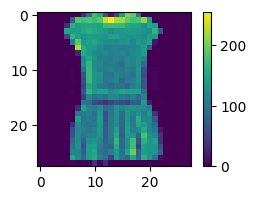

In [11]:
plt.figure(figsize=(3,2))
plt.imshow(train_img[3])
plt.colorbar()
plt.show()


# Data Preprocessing

Now, for a single picture of 28X28 = 784 pixels, one single pixel can have value from 0 to 255. To standardize this, we will divide each pixel by 255.

In [12]:
train_img_scaled = train_img / 255.0
test_img_scaled = test_img / 255.0

In [13]:
train_img_scaled[0].shape

(28, 28)

In [14]:
train_img_scaled[1,12,12]

0.807843137254902

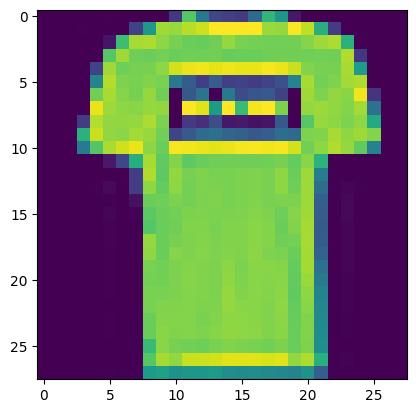

In [24]:
plt.imshow(train_img_scaled[1])

## Building the Model

In [37]:
###layers
l0 = tf.keras.layers.Flatten(input_shape=(28,28))
l1 = tf.keras.layers.Dense(units=512, activation = 'sigmoid')
l1 = tf.keras.layers.Dense(units=512, activation = 'sigmoid')
d2 = tf.keras.layers.Dropout(0.2)
l2 = tf.keras.layers.Dense(units=10, activation='softmax')


layers = [l0,l1,l2]
model = tf.keras.Sequential(layers)

## Compiling the Model

In [38]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fitting 

#### Callback

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                            min_delta = 0.001,
                                            patience = 2
                                            )

In [40]:
model.fit(train_img_scaled, train_label, epochs=15, shuffle=True, validation_split = 0.2, callbacks=[callback], verbose=2)

Epoch 1/15
1500/1500 - 5s - loss: 0.5241 - accuracy: 0.8133 - val_loss: 0.4364 - val_accuracy: 0.8398 - 5s/epoch - 3ms/step
Epoch 2/15
1500/1500 - 4s - loss: 0.3997 - accuracy: 0.8550 - val_loss: 0.3857 - val_accuracy: 0.8598 - 4s/epoch - 2ms/step
Epoch 3/15
1500/1500 - 4s - loss: 0.3591 - accuracy: 0.8692 - val_loss: 0.3706 - val_accuracy: 0.8612 - 4s/epoch - 3ms/step
Epoch 4/15
1500/1500 - 4s - loss: 0.3279 - accuracy: 0.8792 - val_loss: 0.3522 - val_accuracy: 0.8703 - 4s/epoch - 2ms/step
Epoch 5/15
1500/1500 - 4s - loss: 0.3061 - accuracy: 0.8869 - val_loss: 0.3369 - val_accuracy: 0.8730 - 4s/epoch - 2ms/step
Epoch 6/15
1500/1500 - 4s - loss: 0.2869 - accuracy: 0.8930 - val_loss: 0.3157 - val_accuracy: 0.8834 - 4s/epoch - 3ms/step
Epoch 7/15
1500/1500 - 4s - loss: 0.2703 - accuracy: 0.8995 - val_loss: 0.3260 - val_accuracy: 0.8849 - 4s/epoch - 2ms/step
Epoch 8/15
1500/1500 - 4s - loss: 0.2553 - accuracy: 0.9041 - val_loss: 0.3147 - val_accuracy: 0.8862 - 4s/epoch - 2ms/step
Epoch 9/

## Evaluation

In [41]:
test_loss, test_acc = model.evaluate(test_img, test_label, verbose=2)
print('Test Accuracy : ',test_acc)
print('Test Loss : ', test_loss)

313/313 - 1s - loss: 0.3835 - accuracy: 0.8731 - 642ms/epoch - 2ms/step
Test Accuracy :  0.8730999827384949
Test Loss :  0.3835013508796692


## Prediction

In [42]:
pred = model.predict(test_img)

313/313 [==============================] - 1s 3ms/step


In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [54]:
test_img[0].shape

(28, 28)

Shirt


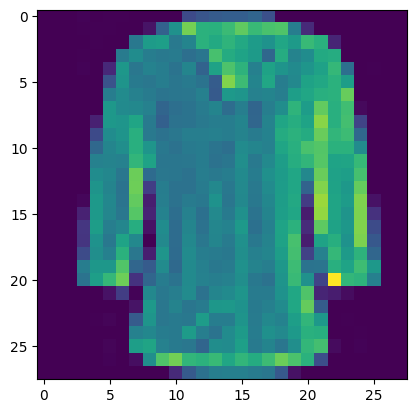

In [59]:
print(class_names[np.argmax(pred[4])])
plt.imshow(test_img[4])
plt.show()